In [43]:
# imports dependancies 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime 
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

In [115]:
# imports national election data and convert it into a dataframe
election_data = pd.read_csv("National Presidential Polls 2008-2020.csv")
# election_data.drop(columns=["Unnamed: 7", "Unnamed: 8"])
election_data
# autolabel functions written by: tozcss from: https://stackoverflow.com/questions/930397/getting-the-last-element-of-a-list
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % float(height) + "%",
                ha='center', va='bottom')
# creates a function for creating box plots by election cycle        
def plots(df):
    # converts persents to floats
    df["Democratic candidate"] = 100 * df["Democratic candidate"].astype(float)
    df["Republican candidate"] = 100 * df["Republican candidate"].astype(float)
    # stores teh avarge vote share for each candidate in y
    y = (df["Democratic candidate"].mean(), df["Republican candidate"].mean())
    # graphs vote share vr. candidate
    fig1 = plt.bar(["Democratic candidate","Republican candidate"], y, color=("b", "r"))
    # adds lables and title
    plt.xlabel("Party")
    plt.ylabel("Projected Vote Share")
    autolabel(fig1)


In [116]:
# divides election data into 4 different data frames by year
df_08 = election_data[election_data["Cycle"] == 2008]
df_12 = election_data[election_data["Cycle"] == 2012]
df_16 = election_data[election_data["Cycle"] == 2016]
df_20 = election_data[election_data["Cycle"] == 2020]

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



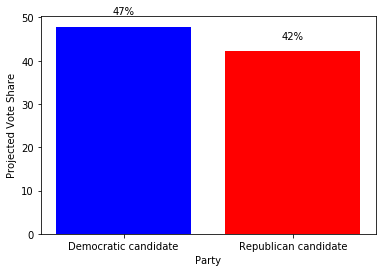

In [117]:
# plots bar chart for 2008 data
plots(df_08)

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



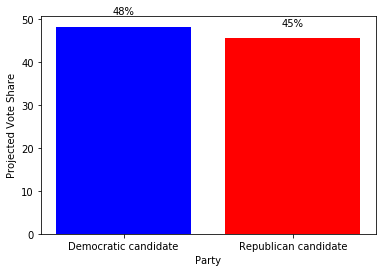

In [118]:
# plots bar chart for 2012 data
plots(df_12)

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



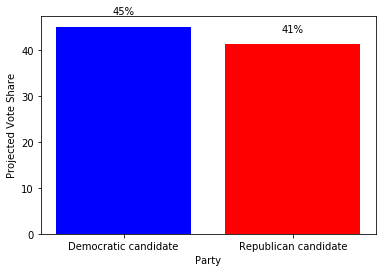

In [119]:
# plots bar chart for 2016 data
plots(df_16)

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\super\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



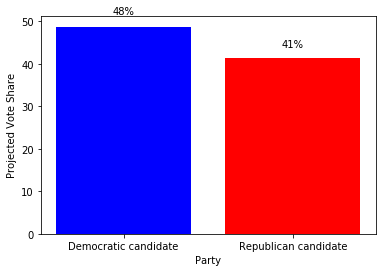

In [120]:
# plots bar chart for 2020 data
plots(df_20)

In [88]:
# creates a function that plots scatter plots for each year
def scatterplot(df):
    # creates a new dict for reformating election data
    dicts = { "Date administered": [],
               "Candidate": [],
               "Vote Share": []    
    }
    # iterates through orignaonal dataframe and stores data, candite party, and vote share
    for row1 in df.iterrows():
        dicts["Date administered"].append(row1[1]["Date administered"])
        dicts["Candidate"].append("Democratic candidate")
        dicts["Vote Share"].append(row1[1]["Democratic candidate"])
        
    for row2 in df.iterrows():    
        dicts["Date administered"].append(row2[1]["Date administered"])
        dicts["Candidate"].append("Republican candidate")
        dicts["Vote Share"].append(row2[1]["Republican candidate"])
    # create a new dataframe
    new_df= pd.DataFrame(dicts)
    x = []
    y = 1
    # converts data admistered column into numeric data
    for i in range(1, df["Date administered"].count()):
        if df.iloc[i,1] == df.iloc[(i - 1), 1]:
            x.append(y)
        else:
            y += 1
            x.append(y)
    x.append(x[-1])
    # drops null values
    new_df = new_df.dropna()
    # adds converted numbers to data frame
    new_df["Days"] = x*2
  
    # creates scatter plot and adds trendline
    fig = px.scatter(new_df, x="Days", y="Vote Share", color= "Candidate", trendline="lowess")
    return fig

fig = scatterplot(df_08)
fig.update_layout(
    title="2008 Polling Data")

In [87]:
fig = scatterplot(df_12)
fig.update_layout(
    title="2012 Polling Data")

In [98]:
str(df_08["Cycle"][1])

'2008.0'